In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
%matplotlib inline

# Data generation

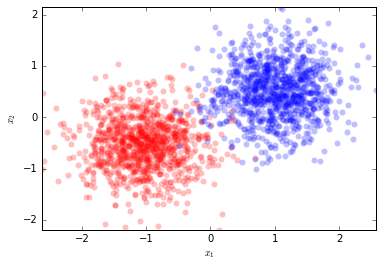

In [2]:
data_x_0 = []; data_x_1 = []
for _ in range(1000):
    data_x_0.append([np.random.normal(-1., .5), np.random.normal(-0.5, .5)])
    data_x_1.append([np.random.normal(+1., .5), np.random.normal(+0.5, .5)])
data_x_0 = np.array(data_x_0); data_x_1 = np.array(data_x_1)
data_x = np.row_stack((data_x_0, data_x_1))
data_y = np.row_stack((np.zeros((data_x_0.shape[0], 1)), np.ones((data_x_1.shape[0], 1))))
data_x, data_y = shuffle(data_x, data_y)
plt.axis((min(data_x[:,0]), max(data_x[:,0]), min(data_x[:,1]), max(data_x[:,1])))
plt.plot(data_x_0[:,0], data_x_0[:,1], 'ro', markeredgewidth=0.0, alpha=0.25)
plt.plot(data_x_1[:,0], data_x_1[:,1], 'bo', markeredgewidth=0.0, alpha=0.25)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# NN design

In [3]:
X  = tf.placeholder(tf.float32)
y  = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0))        
b = tf.Variable(tf.zeros([1]))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
loss = tf.reduce_mean(-y * tf.log(hypothesis) - (1-y) * tf.log(1-hypothesis))

# Trainining and visualization

The decision boundary is computed based on following equation $w_0 x_0 + w_1 x_1 + b = 0$.

iter	w1	w2	b	loss
1	-0.134	0.559	-0.000	0.630
100	1.673	1.267	0.026	0.139
200	2.284	1.495	0.047	0.095
300	2.670	1.639	0.062	0.078
400	2.955	1.747	0.074	0.069
500	3.183	1.834	0.084	0.063
600	3.373	1.908	0.092	0.059
700	3.537	1.973	0.100	0.056
800	3.682	2.030	0.106	0.053
900	3.810	2.082	0.112	0.051
1000	3.927	2.129	0.118	0.050


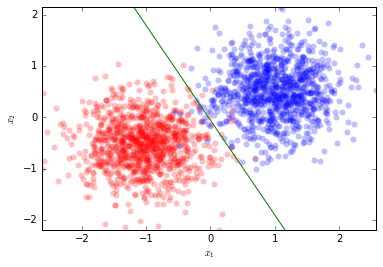

In [4]:
optimizer = tf.train.GradientDescentOptimizer(tf.Variable(0.1))
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    # Fit the NN
    sess.run(init)
    print('iter\tw1\tw2\tb\tloss')
    for i in xrange(1000):
        sess.run(train_op, feed_dict={X:data_x, y:data_y})
        if ((i+1) % 100 == 0) or i == 0:
            print '%d\t%.3f\t%.3f\t%.3f\t%.3f'%(i+1, sess.run(W)[0], sess.run(W)[1], sess.run(b)[0],
                                          sess.run(loss, feed_dict={X:data_x, y:data_y}))
    
    # Print the results
    line_x = np.array([np.min(data_x[:,0]), np.max(data_x[:,0])])
    line_y = (float(sess.run(W)[0]) * line_x + float(sess.run(b))) / -float(sess.run(W)[1])
    plt.axis((min(data_x[:,0]), max(data_x[:,0]), min(data_x[:,1]), max(data_x[:,1])))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.plot(data_x_0[:,0], data_x_0[:,1], 'ro', markeredgewidth=0.0, alpha=0.25)
    plt.plot(data_x_1[:,0], data_x_1[:,1], 'bo', markeredgewidth=0.0, alpha=0.25)
    plt.plot(line_x, line_y, 'g')
    plt.show()